In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [32]:
import sqlalchemy as sqla
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import sessionmaker, Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect


In [4]:
engine = create_engine('sqlite:///hawaii.sqlite', echo=True)
sess = sessionmaker(bind = engine)
s = sess()

In [6]:
Base = automap_base()
Base.prepare(engine, reflect=True)
print(Base.classes.keys())

2021-02-02 18:09:46,337 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-02-02 18:09:46,339 INFO sqlalchemy.engine.base.Engine ()
2021-02-02 18:09:46,341 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-02-02 18:09:46,342 INFO sqlalchemy.engine.base.Engine ()
2021-02-02 18:09:46,343 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2021-02-02 18:09:46,345 INFO sqlalchemy.engine.base.Engine ()
2021-02-02 18:09:46,349 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_xinfo("measurement")
2021-02-02 18:09:46,350 INFO sqlalchemy.engine.base.Engine ()
2021-02-02 18:09:46,353 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'measurement' AND type = 'table'
2021-02-02 18:09:46,355 INFO sqlalchemy.engine.base.Engine ()
2021-02-02 18:09:46,357 INFO sqlal

In [7]:
inspector = inspect(engine)
inspector.get_table_names()

2021-02-02 18:38:18,392 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2021-02-02 18:38:18,395 INFO sqlalchemy.engine.base.Engine ()


['measurement', 'station']

In [40]:
#Save reference to classes

Measure = Base.classes.measurement
Station = Base.classes.station


<class 'sqlalchemy.ext.declarative.api.DeclarativeMeta'>


In [45]:
#Find the latest date
conn=engine.connect()
latest_date=pd.read_sql("SELECT MAX(date) FROM measurement", conn)
latest_date.head()

2021-02-02 19:20:25,747 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("SELECT MAX(date) FROM measurement")
2021-02-02 19:20:25,749 INFO sqlalchemy.engine.base.Engine ()
2021-02-02 19:20:25,751 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("SELECT MAX(date) FROM measurement")
2021-02-02 19:20:25,752 INFO sqlalchemy.engine.base.Engine ()
2021-02-02 19:20:25,753 INFO sqlalchemy.engine.base.Engine SELECT MAX(date) FROM measurement
2021-02-02 19:20:25,755 INFO sqlalchemy.engine.base.Engine ()


,MAX(date)
0,2017-08-23


2021-02-02 21:52:07,242 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("SELECT prcp, date FROM measurement WHERE date >= '2016-08-23'")
2021-02-02 21:52:07,244 INFO sqlalchemy.engine.base.Engine ()
2021-02-02 21:52:07,247 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("SELECT prcp, date FROM measurement WHERE date >= '2016-08-23'")
2021-02-02 21:52:07,248 INFO sqlalchemy.engine.base.Engine ()
2021-02-02 21:52:07,250 INFO sqlalchemy.engine.base.Engine SELECT prcp, date FROM measurement WHERE date >= '2016-08-23'
2021-02-02 21:52:07,251 INFO sqlalchemy.engine.base.Engine ()
      prcp        date
0     0.00  2016-08-23
1     0.08  2016-08-24
2     0.08  2016-08-25
3     0.00  2016-08-26
4     0.00  2016-08-27
...    ...         ...
2225  0.09  2017-08-19
2226   NaN  2017-08-20
2227  0.56  2017-08-21
2228  0.50  2017-08-22
2229  0.45  2017-08-23

[2230 rows x 2 columns]


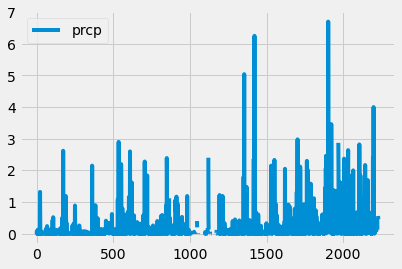

In [113]:
#precipitation analysis
precip=pd.read_sql("SELECT prcp, date FROM measurement WHERE date >= '2016-08-23'", conn)
df1 = pd.DataFrame(precip)
df1.sort_values(by=['date'])
df1.plot(kind='line')

In [50]:
#summary statistics

df1.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [60]:
#find the number of stations

stations=pd.read_sql("SELECT * FROM station", conn)
df2 = pd.DataFrame(stations)
print(len(df2['station']))


2021-02-02 19:46:12,833 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("SELECT * FROM station")
2021-02-02 19:46:12,835 INFO sqlalchemy.engine.base.Engine ()
2021-02-02 19:46:12,838 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("SELECT * FROM station")
2021-02-02 19:46:12,840 INFO sqlalchemy.engine.base.Engine ()
2021-02-02 19:46:12,841 INFO sqlalchemy.engine.base.Engine SELECT * FROM station
2021-02-02 19:46:12,844 INFO sqlalchemy.engine.base.Engine ()
9


In [73]:
#station observation counts in descending order
stationcount = pd.read_sql("SELECT * FROM measurement", conn)
df3 = pd.DataFrame(stationcount)
df5 = df3['station'].value_counts()
df5.sort_values(ascending=False)

2021-02-02 20:04:39,719 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("SELECT * FROM measurement")
2021-02-02 20:04:39,721 INFO sqlalchemy.engine.base.Engine ()
2021-02-02 20:04:39,725 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("SELECT * FROM measurement")
2021-02-02 20:04:39,726 INFO sqlalchemy.engine.base.Engine ()
2021-02-02 20:04:39,727 INFO sqlalchemy.engine.base.Engine SELECT * FROM measurement
2021-02-02 20:04:39,729 INFO sqlalchemy.engine.base.Engine ()


USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [103]:
#USC00519281 has the most observations
#station analysis
FindTemp1 = pd.read_sql("SELECT tobs FROM measurement WHERE station='USC00519281'", conn)
df4 = pd.DataFrame(FindTemp1)
import statistics as stats

print(stats.mean(df4['tobs']), min(df4['tobs']), max(df4['tobs']))



2021-02-02 20:59:49,600 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("SELECT tobs FROM measurement WHERE station='USC00519281'")
2021-02-02 20:59:49,602 INFO sqlalchemy.engine.base.Engine ()
2021-02-02 20:59:49,604 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("SELECT tobs FROM measurement WHERE station='USC00519281'")
2021-02-02 20:59:49,606 INFO sqlalchemy.engine.base.Engine ()
2021-02-02 20:59:49,608 INFO sqlalchemy.engine.base.Engine SELECT tobs FROM measurement WHERE station='USC00519281'
2021-02-02 20:59:49,611 INFO sqlalchemy.engine.base.Engine ()
71.66378066378067 54.0 85.0


2021-02-02 21:14:54,740 INFO sqlalchemy.engine.base.Engine SELECT measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE measurement.station = ? AND measurement.date >= ?
2021-02-02 21:14:54,742 INFO sqlalchemy.engine.base.Engine ('USC00519281', '2016-08-23')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f07b545b0>]],
      dtype=object)

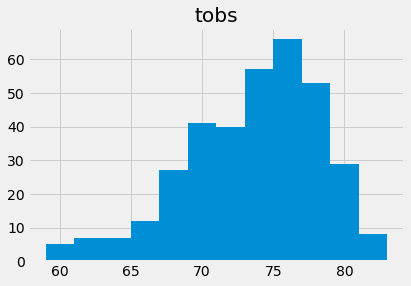

In [111]:
#filtration and histogram

jump = s.query(Measure.station, Measure.date, Measure.tobs).filter(Measure.station == 'USC00519281').filter(Measure.date >= '2016-08-23').all()
dict1 = []
for i in jump:
    dict1.append(i)
    
df6 = pd.DataFrame(dict1)
df6.hist(['tobs'], bins=12)

In [116]:
s.close()

<class 'pandas.core.frame.DataFrame'>


In [ ]:
from flask import Flask, jsonify
_name_ = 'test'
app = Flask(_name_)

@app.route('/')
def home():
    return(f"/api/v1.0/precipitation" f"/api/v1.0/stations" f"/api/v1.0/tobs" f"/api/v1.0/<start>" f"/api/v1.0/<start>/<end>")

@app.route('/api/v1.0/precipitation')
def dictionary():
    sess=Session(engine)
    reslt = sess.query(Measure.date, Measure.prcp).all()
    aln = []
    for prcp, date in reslt:
        edict = {}
        edict["prcp"] = prcp
        edict["date"] = date
        aln.append(edict)
    return jsonify(aln)

@app.route('/api/v1.0/stations')
def liest():
    sess=Session(engine)
    app1 = sess.query(Station.station).all()
    sess.close()
    fin = list(np.ravel(app1))
    return jsonify(fin)


@app.route('/api/v1.0/tobs')
def mix():
    sess=Session(engine)
    ope = pd.read_sql("SELECT date, tobs FROM measurement WHERE station='USC00519281'", conn)
    sess.close()
    liast = list(np.ravel(ope))
    return jsonify(liast)

@app.route('/api/v1.0/<start>')
def endgame():
    sess=Session(engine)
    old = pd.read_sql("SELECT tobs, date FROM measurement WHERE date BETWEEN '2016-08-23' AND '2016-09-30'", conn)
    df9 = pd.DataFrame(old)
    newdic = []
    for i in df9:
        if df9["date"] >= '2016-08-23':
            newdic.append(i)
    df10 = pd.DataFrame(newdic)
    newdic2 = [min(df10["tobs"]), max(df10["tobs"]), stats.mean(df10["tobs"])]
    sess.close()
    return jsonify(newdic)
    return jsonify(newdic2)

@app.route('/api/v1.0/<start>/<end>')
def endgame2():
    sess=Session(engine)
    semiold = pd.read_sql("SELECT tobs FROM measurement WHERE date BETWEEN '2016-08-23' AND '2016-09-30'", conn)
    df11 = pd.DataFrame(semiold)
    newdic3 = []
    for j in df9["tobs"]:
        newdic3.append(j)
    df12 = pd.DataFrame(newdic3)
    newdic1 = [min(df12["tobs"]), max(df12["tobs"]), stats.mean(df12["tobs"])]
    sess.close()
    return jsonify(newdic3)
    return jsonify(newdic1)
    
    
if _name_ == 'test':
    app.run(debug=True, use_reloader=False)

 * Serving Flask app "test" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
